## Day 1 — Setup & Imports

### Quick note on w and b
- **w** is the slope parameter (how steep the line is)
- **b** is the bias parameter (where the line crosses the y-axis)
- We tweak w and b to make predictions line up with the data (by minimizing the cost).


# Linear Regression (from scratch)
Goal: implement linear regression from scratch with NumPy.
Steps: derive gradients, implement training loop, plot loss.

Following Andrew Ng ML Course - Week 1

## Day 2 — Generate & Visualize a Synthetic Linear Dataset


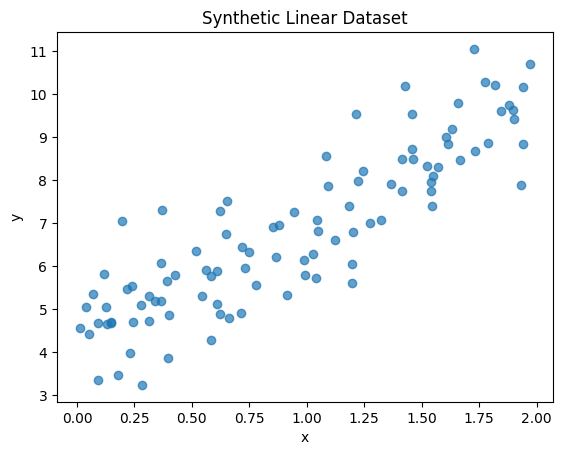

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # keep results reproducible each run

# Fake (but realistic) linear data:
# x values live roughly in [0, 2]
x = 2 * np.random.rand(100)  # shape (100,) - 1D array

# The underlying rule I used to generate targets:
# y = 4 + 3x + ε, where ε is small Gaussian (normal) noise ~ N(0, 1)
# Noise makes points look like real measurements (never perfectly on the line).
y = 4 + 3 * x + np.random.randn(100)  # shape (100,) - 1D array

# Visual check: should look like a fuzzy line with positive slope
plt.scatter(x, y, alpha=0.7)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Synthetic Linear Dataset")
plt.show()


## Days 3 to 5 — Cost Function & Gradient Descent

**Goal today**
- Define hypothesis and **cost function** J(w,b)
- Implement **gradient descent**
- Train on synthetic data and **watch the cost decrease**


In [3]:
# Prepare data for linear regression
try:
    x  # reuse from Day 2 if present
    y
except NameError:
    # Fallback: generate the same synthetic dataset if notebook was restarted
    np.random.seed(42)
    x = 2 * np.random.rand(100)
    y = 4 + 3 * x + np.random.randn(100)

import numpy as np

m = len(y)
print("x shape:", x.shape)
print("y shape:", y.shape)


x shape: (100,)
y shape: (100,)


In [4]:
# Linear Regression Functions
def predict(x, w, b):
    """Make predictions using linear model: y = w*x + b
    x: (m,) input features
    w: scalar slope parameter
    b: scalar bias parameter
    """
    return w * x + b

def compute_cost(x, y, w, b):
    """Mean Squared Error (MSE) cost for linear regression.
    x: (m,) input features
    y: (m,) targets
    w: scalar slope parameter
    b: scalar bias parameter
    """
    m = len(y)
    preds = predict(x, w, b)           # model predictions
    errors = preds - y                 # residuals (how far off we are)
    J = (1 / (2 * m)) * np.sum(errors ** 2)  # the classic MSE / 2
    return J

# Sanity check at w=0, b=0 (usually large, since the line is at y=0)
try:
    x, y
except NameError:
    # if running this cell in isolation, rebuild data quickly
    import numpy as np
    np.random.seed(42)
    x = 2 * np.random.rand(100)
    y = 4 + 3 * x + np.random.randn(100)

compute_cost(x, y, w=0.0, b=0.0)


np.float64(25.00415182181856)

In [5]:
# Gradient Descent Implementation
def compute_gradients(x, y, w, b):
    """Compute gradients for linear regression.
    x: (m,) input features
    y: (m,) targets
    w: scalar slope parameter
    b: scalar bias parameter
    Returns: (dj_dw, dj_db) gradients
    """
    m = len(y)
    yhat = predict(x, w, b)
    err = yhat - y
    dj_dw = (1/m) * np.sum(err * x)   # slope gradient
    dj_db = (1/m) * np.sum(err)       # bias gradient
    return dj_dw, dj_db

def gradient_descent(x, y, w0=0.0, b0=0.0, alpha=0.1, num_iters=1000):
    """gradient descent.
    alpha: learning rate (how big a step we take each update)
    num_iters: number of parameter updates
    Returns: (w, b, cost_history)
    """
    w, b = w0, b0
    J_hist = []
    
    for _ in range(num_iters):
        dj_dw, dj_db = compute_gradients(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        J_hist.append(compute_cost(x, y, w, b))
    
    return w, b, J_hist

# Train from a simple starting point w=0, b=0
w_final, b_final, J_hist = gradient_descent(x, y, w0=0.0, b0=0.0, alpha=0.1, num_iters=1000)
print(f"Final parameters: w={w_final:.3f}, b={b_final:.3f}")


Final parameters: w=2.770, b=4.215


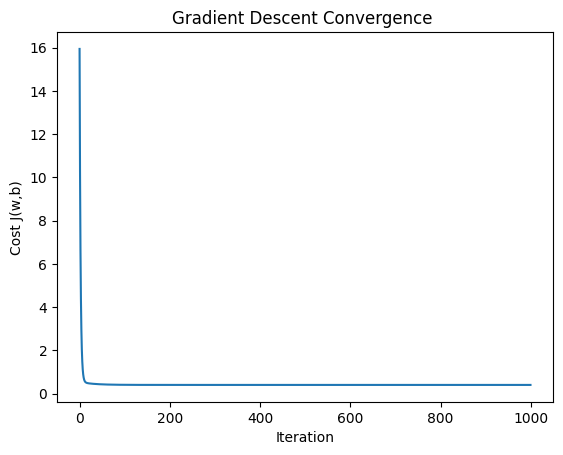

In [6]:
# Cost should steadily decrease if learning rate is sensible
import matplotlib.pyplot as plt

plt.plot(J_hist)
plt.xlabel("Iteration")
plt.ylabel("Cost J(w,b)")
plt.title("Gradient Descent Convergence ")
plt.show()


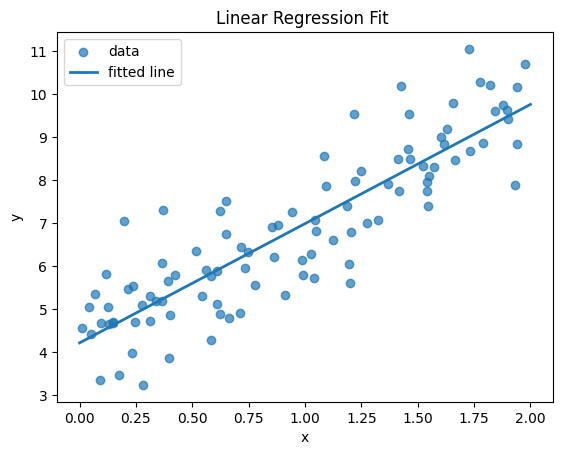

In [7]:
# Draw the learned line on top of the data to eyeball the fit
import numpy as np
import matplotlib.pyplot as plt

x_line = np.array([0.0, 2.0])           # span of our x range
y_line = predict(x_line, w_final, b_final)  # model's prediction

plt.scatter(x, y, alpha=0.7, label="data")
plt.plot(x_line, y_line, label="fitted line", linewidth=2)
plt.xlabel("x"); plt.ylabel("y"); plt.title("Linear Regression Fit ")
plt.legend()
plt.show()


## Week 1 — Complete

In [8]:
# Closed-form Solution (Normal Equation equivalent)
# For linear regression: y = w*x + b
# Closed-form solution using statistical formulas

# Make sure x and y exist (regenerate if needed)
try:
    x, y
except NameError:
    np.random.seed(42)
    x = 2 * np.random.rand(100)
    y = 4 + 3 * x + np.random.randn(100)

# closed-form solution (no matrices needed)
x_mean, y_mean = x.mean(), y.mean()
w_ne = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
b_ne = y_mean - w_ne * x_mean

print(f"Closed-form: w={w_ne:.3f}, b={b_ne:.3f}")
print(f"Gradient Descent: w={w_final:.3f}, b={b_final:.3f}")

# Compare how close both solutions are
w_diff = abs(w_ne - w_final)
b_diff = abs(b_ne - b_final)
print(f"Difference: Δw={w_diff:.6f}, Δb={b_diff:.6f}")


Closed-form: w=2.770, b=4.215
Gradient Descent: w=2.770, b=4.215
Difference: Δw=0.000000, Δb=0.000000


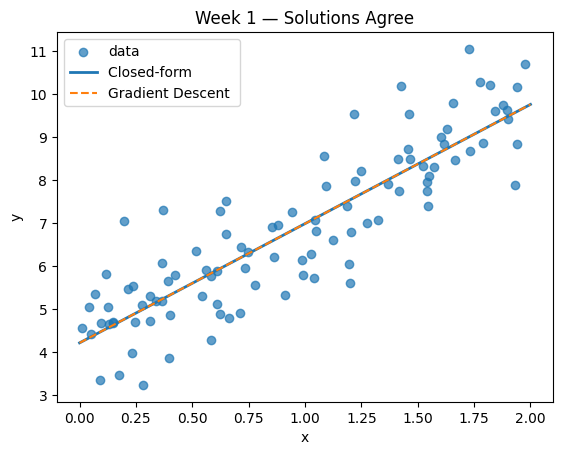

In [9]:
# Overlay predictions from both methods
import numpy as np
import matplotlib.pyplot as plt

x_line = np.array([0.0, 2.0])
y_pred_ne = predict(x_line, w_ne, b_ne)
y_pred_gd = predict(x_line, w_final, b_final)

plt.scatter(x, y, alpha=0.7, label="data")
plt.plot(x_line, y_pred_ne, label="Closed-form ", linewidth=2)
plt.plot(x_line, y_pred_gd, linestyle="--", label="Gradient Descent ")
plt.xlabel("x"); plt.ylabel("y"); plt.title("Week 1 — Solutions Agree")
plt.legend()
plt.show()


In [ ]:
# Interactive Gradient Descent Visualization
from ipywidgets import interact, IntSlider

# Run gradient descent and store all w, b values for visualization
def gradient_descent_with_history(x, y, w0=0.0, b0=0.0, alpha=0.1, num_iters=50):
    """gradient descent that stores parameter history."""
    w, b = w0, b0
    w_hist, b_hist = [w], [b]
    
    for _ in range(num_iters):
        dj_dw, dj_db = compute_gradients(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        w_hist.append(w)
        b_hist.append(b)
    
    return w, b, w_hist, b_hist

# Run with history tracking
_, _, w_hist, b_hist = gradient_descent_with_history(x, y, w0=0.0, b0=0.0, alpha=0.1, num_iters=30)
x_line = np.array([0.0, 2.0])

def plot_iteration(iter_idx=0):
    plt.figure(figsize=(6, 4))
    plt.scatter(x, y, alpha=0.7, label="data")
    plt.xlabel("x"); plt.ylabel("y")
    plt.title(f"GD Progress — Iteration {iter_idx}")
    
    # Closed-form solution (target)
    y_ne = predict(x_line, w_ne, b_ne)
    plt.plot(x_line, y_ne, "g-", label="Closed-form ")
    
    # Current GD line
    y_gd = predict(x_line, w_hist[iter_idx], b_hist[iter_idx])
    plt.plot(x_line, y_gd, "r--", label="GD iteration")
    plt.legend()
    plt.show()

# Interactive slider
interact(plot_iteration, iter_idx=IntSlider(min=0, max=len(w_hist)-1, step=1, value=0))


interactive(children=(IntSlider(value=0, description='iter_idx', max=30), Output()), _dom_classes=('widget-int…

<function __main__.plot_iteration(iter_idx=0)>

### Reflection (Week 1)
- Both methods learn similar parameters (**θ₀ ≈ intercept**, **θ₁ ≈ slope**).  
- **Normal Equation** gives a direct solution (fast for small features), while **Gradient Descent** scales to big feature sets and generalises to other models.  
- Adding **Gaussian noise** made the dataset realistic — the fitted line captures the trend, not every point.  
- Intuition locked in: we tweak **w** and **b** to **minimise cost (MSE)** so predictions match data better over time.
